# Тест YOLO на COCO датасете

1. Загрузите YOLOv5 из репозитория: [https://pytorch.org/hub/ultralytics_yolov5/](https://pytorch.org/hub/ultralytics_yolov5/)
или с [TorchHub](https://pytorch.org/hub/ultralytics_yolov5/)

2.  Используйте самую быструю модель yolov5s
  https://github.com/ultralytics/yolov5/releases

3. убедитесь что модель отрабатывает на произвольной картинке

4. Используя [pycocotools](https://github.com/cocodataset/cocoapi.git)
Загрузите 5 первых изображений с велосипедами


5. Проведите детектирование велосипедов при помощи YOLOv5

6. Выведите картинки с наложенными на них BoundingBox: детектированные YOLO - красным цветом, разметку из COCO - зеленым

7. Дополнително: Оцените точность детектирования по метрике [AP](https://cocodataset.org/#detection-eval) используя  [cocoEval.evaluate](https://github.com/cocodataset/cocoapi/blob/master/PythonAPI/pycocotools/cocoeval.py)





##  Загрузите YOLOv5 
из репозитория: [https://pytorch.org/hub/ultralytics_yolov5/](https://pytorch.org/hub/ultralytics_yolov5/) или 
с с [TorchHub](https://pytorch.org/hub/ultralytics_yolov5/)

Используйте самую быструю модель **yolov5s** https://github.com/ultralytics/yolov5/releases

In [1]:
import torch

model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-2-14 Python-3.8.10 torch-1.13.1+cu116 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


## Smoke test

Убедитесь что модель отрабатывает на произвольной картинке

Используйте самую быструю модель yolov5s  https://github.com/ultralytics/yolov5/releases

In [2]:
from PIL import Image

! wget -O cat.png https://edunet.kea.su/repo/EduNet-content/L12/out/semantic_segmentation_1.png

img = Image.open("/content/cat.png")

--2023-02-14 21:04:49--  https://edunet.kea.su/repo/EduNet-content/L12/out/semantic_segmentation_1.png
Resolving edunet.kea.su (edunet.kea.su)... 188.44.53.138
Connecting to edunet.kea.su (edunet.kea.su)|188.44.53.138|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 348184 (340K) [image/png]
Saving to: ‘cat.png’

cat.png             100%[===================>] 340.02K   491KB/s    in 0.7s    

2023-02-14 21:04:51 (491 KB/s) - ‘cat.png’ saved [348184/348184]



In [3]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

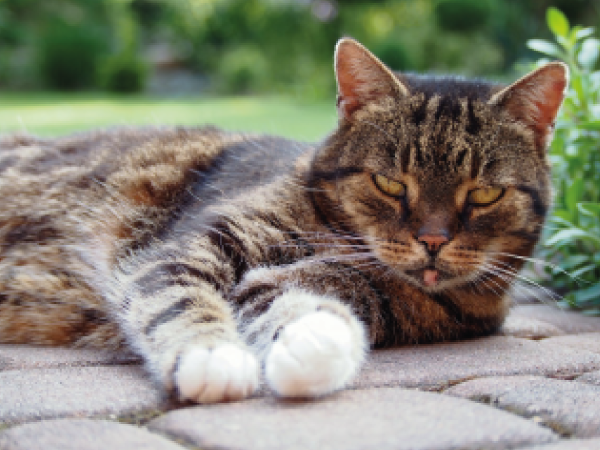

In [4]:
display(img)

In [5]:
result = model(img)

In [6]:
result = result.pandas().xyxy[0]
result

,xmin,ymin,xmax,ymax,confidence,class,name
0,0.0,33.674553,555.97644,407.134857,0.608002,15,cat


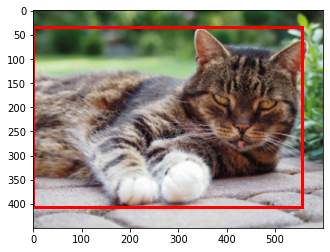

In [7]:
%matplotlib inline

plt.imshow(img)
ax = plt.gca()
result['h'] = result.ymax - result.ymin
result['w'] = result.xmax - result.xmin
rect = Rectangle((result.at[0, 'xmin'], result.at[0, 'ymin']), result.at[0, 'w'], result.at[0, 'h'], linewidth=3, edgecolor='r', facecolor='none')

ax.add_patch(rect)
plt.show()

Видим кошку там где кошка

Результат содержит границы, уверенность в соответствии объекта классу, номер и название класса. 

## Загрузка данных

Загрузите 5 первых изображений с велосипедами из COCO

*  Используйте [pycocotools](https://github.com/cocodataset/cocoapi.git)

*  Выведите загруженные изображения



In [8]:
from pycocotools.coco import COCO
import requests, zipfile, io

r = requests.get(
    "http://images.cocodataset.org/annotations/annotations_trainval2017.zip"
)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [9]:
coco = COCO("annotations/instances_val2017.json")
catIds = coco.getCatIds(catNms=["bicycle"])
imgIds = coco.getImgIds(catIds=catIds)
img_list = coco.loadImgs(imgIds[:5])
annIds = coco.getAnnIds(imgIds=imgIds[5])
anns = coco.loadAnns(annIds)

loading annotations into memory...
Done (t=1.56s)
creating index...
index created!


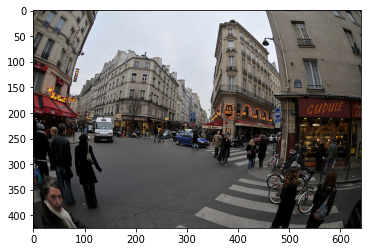

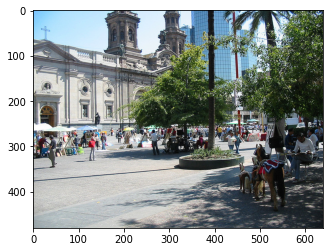

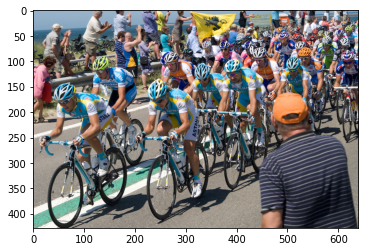

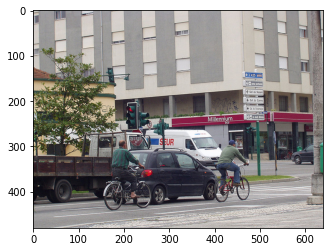

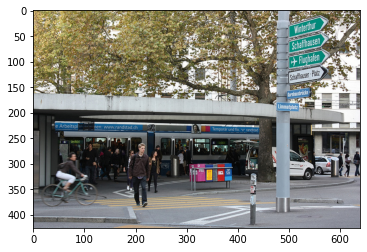

In [10]:
import skimage.io as io
for i in range(5):
  img = img_list[i]
  I = io.imread(img['coco_url'])
  plt.imshow(I)
  plt.show()

5 первых велосипедных изображений: различаются по количеству велосипедов, фону и видимости велосипедов. Попробуем проверить, как на них работает модель.

## Детектирование

Детектируйте на загруженных картинках велосипеды при помощи YOLO

Затем выведите предсказанные YOLO bbox красным цветом, а разметку из COCO зеленым цветом.

https://pytorch.org/vision/stable/utils.html

### Формат результата

<img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/Exercises/EX12/result_4_task_ex12.png"  width="400">






          xmin        ymin        xmax        ymax  confidence  class  \
0    79.799370  238.137650  136.437378  384.768005    0.893729      0   
1    30.300352  222.188324   82.438965  378.816864    0.881984      0   
2     5.502529  330.085480  105.030823  424.352997    0.769542      0   
3     0.331059  216.241333   36.459759  352.374939    0.760476      0   
4   349.937622  233.135269  369.216125  288.726593    0.749674      0   
5   568.663452  250.496490  593.735474  319.329865    0.731085      0   
6   415.766968  252.920746  436.320923  312.057220    0.708924      0   
7   118.985344  210.604034  156.632477  258.527771    0.704248      7   
8   436.160126  248.027161  457.493683  307.311707    0.688186      0   
9   363.508240  236.359833  386.802124  303.008636    0.623547      0   
10  308.177307  232.393036  323.708740  270.235931    0.616291      0   
11  252.024261  233.782303  270.517548  251.541718    0.602443      2   
12  549.195862  254.384125  572.375427  320.151093 

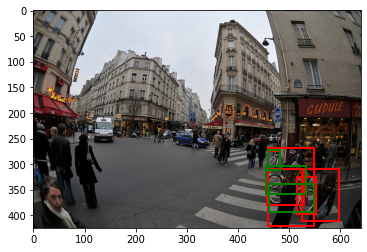

          xmin        ymin        xmax        ymax  confidence  class  \
0   258.030701  263.071106  278.993958  320.713928    0.787834      0   
1   483.539001  306.014374  564.433533  442.329498    0.743154     17   
2   120.405624  274.821350  139.835098  332.530945    0.709000      0   
3    31.382141  275.058319   52.860916  348.548920    0.631621      0   
4   565.229248  263.308807  623.363892  374.264740    0.623677      0   
5   428.445282  268.123383  448.422760  314.349945    0.594250      0   
6   604.901245  259.973938  630.558716  306.411865    0.572231      0   
7   555.260559  259.188934  581.352966  309.021271    0.565191      0   
8   442.424591  269.260406  462.952484  317.106293    0.561137      0   
9     0.000000  247.948608   44.729347  266.946228    0.469683     25   
10  149.976974  267.767090  163.146469  307.860535    0.437848      0   
11  362.135590  275.073883  376.918610  305.521210    0.405665      0   
12   10.403522  275.813110   29.915646  325.673523 

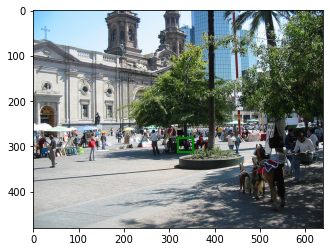

          xmin        ymin        xmax        ymax  confidence  class  \
0   443.417419  161.674667  632.953796  427.216187    0.942367      0   
1    16.781349  240.054932  186.781982  425.268494    0.871577      1   
2     0.048088   90.001015   50.868813  223.347137    0.808804      0   
3   206.554901  238.909546  344.488678  412.528503    0.799398      1   
4   207.432236  130.586700  339.325500  360.108002    0.775741      0   
5     8.619987  141.866058  163.572052  318.921600    0.699405      0   
6   596.767334  147.921005  640.000000  259.486542    0.676996      1   
7   111.978439   91.050583  205.330002  256.231812    0.627563      0   
8   373.812561  196.812836  455.507874  352.280792    0.618946      1   
9    97.163284    0.740421  151.269699  122.635834    0.528395      0   
10   18.888355   26.162785   81.485992  132.700745    0.526978      0   
11  570.468628  120.528946  598.508545  192.854416    0.476447      1   
12  536.544373  142.512024  583.142883  240.542908 

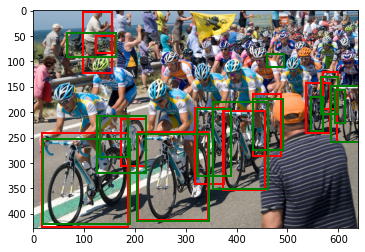

          xmin        ymin        xmax        ymax  confidence  class  \
0   405.042908  286.019928  478.186768  395.187775    0.888276      0   
1   229.596954  305.882721  407.250763  427.392059    0.872713      2   
2   570.090210  291.791962  621.129517  341.332489    0.855354      2   
3   402.526703  337.177429  478.392303  421.312073    0.835315      1   
4   155.592102  347.296814  260.987122  442.352051    0.833942      1   
5   171.735077  284.581390  241.577667  421.347382    0.814601      0   
6   203.556396  199.614609  230.729248  260.661102    0.770943      9   
7   234.629761  224.861679  260.376129  261.220673    0.738602      9   
8   273.479004  262.033478  418.354797  346.806793    0.703551      7   
9     1.271210  260.431091  280.480774  425.250183    0.650412      7   
10  269.483459  245.507050  287.640869  276.599640    0.500683      9   
11    0.000000  315.075195  187.386139  423.866211    0.312098      7   

             name  
0          person  
1         

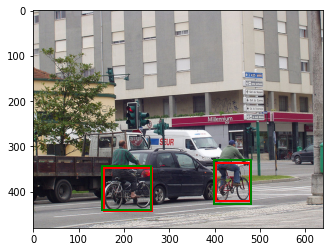

          xmin        ymin        xmax        ymax  confidence  class     name
0   186.631210  258.974365  232.406235  386.122192    0.791306      0   person
1   414.067810  268.499420  551.848999  331.159943    0.777460      2      car
2    45.722389  278.204193  103.243004  359.028839    0.775593      0   person
3   626.131836  275.296112  640.000000  326.278046    0.737308      0   person
4    16.550186  319.932281  132.860321  384.703705    0.733453      1  bicycle
5   224.379517  263.146423  251.726410  357.857727    0.657454      0   person
6    92.513916  256.462372  128.463196  341.692474    0.640869      0   person
7   149.466766  268.948242  173.281128  331.784302    0.637781      0   person
8   596.255737  277.605713  609.849487  325.671326    0.632887      0   person
9   609.160156  278.811279  622.663574  327.170715    0.613558      0   person
10  526.486572  283.880676  588.383179  322.445190    0.601270      2      car
11  283.681274  268.719635  297.891663  323.852142  

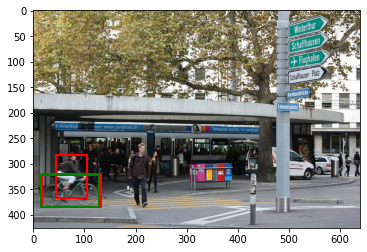

In [11]:
# Your code here
results = []
for n in range(5):
  img = img_list[n]
  annIds = coco.getAnnIds(imgIds = [imgIds[n]], catIds = catIds)
  anns = coco.loadAnns(annIds)
  coco_boxes = []
  for ann in anns:
    coco_boxes.append(ann['bbox'])

  result = model(img['coco_url'])
  result = result.pandas().xyxy[0]
  print(result)
  results.append(result)

  I = io.imread(img['coco_url'])
  plt.imshow(I)

  ax = plt.gca()
  for i in range(len(result)):
    classname = result.at[i, 'name']
    if classname != 'bicycle': continue

    w = result.at[i, 'xmax'] - result.at[i, 'xmin']
    h = result.at[i, 'ymax'] - result.at[i, 'ymin']

    box = Rectangle((result.at[i, 'xmin'], result.at[i, 'ymin']), w, h, color = 'red', fill = False, lw = 2)
    ax.add_patch(box)

  for box in coco_boxes:
    box = Rectangle((box[0], box[1]), box[2], box[3], color = 'green', fill = False, lw = 2)
    ax.add_patch(box)

  plt.show()

как можно видеть, модель справляется достаточно хорошо. Однако, например, на 2 картинке велосипед не найден, на 5 - человек также выделен как велосипед. судя по 1 и 3 картинкам, если велосипед находится в стандартном ракурсе, модель его замечает, иначе - не очень, выделяются зоны крупнее собственно велосипеда, или выделяется несколько зон. Там где велосипед перекрыт чем-то или плохо различим на фоне модель испытывает особые трудности

## Оценка качества 

 Оцените точность детектирования по метрике mAP используя   [cocoEval.evaluate](https://github.com/cocodataset/cocoapi/blob/master/PythonAPI/pycocotools/cocoeval.py)


 P.S. Допускается вместо pycocotools использовать https://github.com/qubvel/segmentation_models.pytorch или https://torchmetrics.readthedocs.io/en/stable/

### Формат результата


Значения AP:

```
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.098
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.259
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.102
 ...
```


Попробуем посчитать, хотя я не полностью поняла, делаю ли я то что нужно. Для расчета average precision по категориям буду использовать демо из репозитория coco

иии здесь возникла проблема создания финального датасета в том формате, который хочет COCO

upd попробовала разные библиотеки для конвертации, не нашла ничего адекватно работающего, посмотрела туториал torchmetrics и поняла что все равно не хочу делать конвертацию в словари руками... 

качества не будет((


можно сделать вывод что это как-то потрясающе сложно